# Blog Code

## Import packages

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

## Web Scraping:
### HIV Data

In [4]:
HIV_data = []

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_HIV/AIDS_adult_prevalence_rate'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable static-row-numbers'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    HIV_data.append(row_data)


# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Create a pandas DataFrame
HIV_df = pd.DataFrame(HIV_data, columns=headers)
display(HIV_df)


,Country/Region,Adult prevalenceof HIV/AIDS[1],Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS[3],Year of estimate
0,Eswatini,28.30%,"240,000","3,000",2024
1,Lesotho,24.10%,"403,000","5,380",2024
2,Botswana,22.60%,"398,500","5,240",2024
3,Zimbabwe,22.10%,"1,660,000","25,600",2024
4,South Africa,14%,"9,230,000","77,000",2024
...,...,...,...,...,...
181,Mongolia,-,"2,500",-,2024
182,British Virgin Islands,-,48,-,2024
183,American Samoa,-,110,-,2023
184,Nauru,-,270,-,2024


## Clean the Data

In [3]:

# rename some column headings
HIV_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
HIV_df.rename(columns={'Adult prevalenceof HIV/AIDS[1]': '% of adults with HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Annual deathsfrom HIV/AIDS[3]': 'Annual deathsfrom HIV/AIDS'}, inplace=True)
HIV_df.rename(columns={'Year of estimate': 'Year'}, inplace=True)



for column in HIV_df.columns:
    if HIV_df[column].dtype == 'object':  # Check if the column contains strings
        HIV_df[column] = HIV_df[column].str.replace(',', '').str.replace(' ', '') .str.replace('%','')
        HIV_df[column] = HIV_df[column].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True)
        
        
display(HIV_df)



# Replace "-" with NaN (null values)
HIV_df.replace("-", np.nan, inplace=True)

# Check for null or missing values
missing_values = HIV_df.isnull().sum()


print("Missing values:")
print(missing_values)



# Filter rows with missing data in '% of adults with HIV/AIDS' column
missing_data_countries = HIV_df[HIV_df['% of adults with HIV/AIDS'].isnull()]['Country']

# Print the list of countries with missing data
print("\nCountries with missing data in '% of adults with HIV/AIDS' column:\n")
print(missing_data_countries)

,Country,% of adults with HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year
0,Eswatini,28.30,240000,3000,2024
1,Lesotho,24.10,403000,5380,2024
2,Botswana,22.60,398500,5240,2024
3,Zimbabwe,22.10,1660000,25600,2024
4,South Africa,14,9230000,77000,2024
...,...,...,...,...,...
181,Mongolia,-,2500,-,2024
182,British Virgin Islands,-,48,-,2024
183,American Samoa,-,110,-,2023
184,Nauru,-,270,-,2024


Missing values:
Country                            0
% of adults with HIV/AIDS         46
Number of peoplewith HIV/AIDS      0
Annual deathsfrom HIV/AIDS       119
Year                               0
dtype: int64

Countries with missing data in '% of adults with HIV/AIDS' column:

116                          Somalia
119                       Bangladesh
120                            Egypt
121                            Yemen
122    Islamic Emirateof Afghanistan
123                        Sri Lanka
124                         Bulgaria
125                          Tunisia
137                     Turkmenistan
138                          Grenada
139               Antiguaand Barbuda
140          Turksand Caicos Islands
141                            Samoa
142                         Dominica
145                       East Timor
147                         Svalbard
148                         Kiribati
149             Saint Kittsand Nevis
153                            Palau
154           

,Missing Countries
0,Somalia
1,Comoros
2,Seychelles


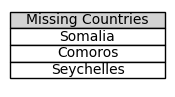

In [4]:
# List of Sub-Saharan African countries
sub_saharan_countries = []

url = 'https://en.wikipedia.org/wiki/Sub-Saharan_Africa'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from the first cell in the row
    cell = row.find('td')
    country_name = cell.get_text(strip=True)
    
    # Append country name to sub_saharan_countries list
    sub_saharan_countries.append(country_name)

# Convert the list to a pandas DataFrame
sub_saharan_countries_df = pd.DataFrame(sub_saharan_countries, columns=['Missing Countries'])




# Filter the DataFrame to include only the countries in missing_data_countries
sub_saharan_countries_filtered = sub_saharan_countries_df[sub_saharan_countries_df['Missing Countries'].isin(missing_data_countries)]

# Reset the index of the filtered DataFrame
sub_saharan_countries_filtered.reset_index(drop=True, inplace=True)


# Display the filtered DataFrame
display(sub_saharan_countries_filtered)




# Create a figure and axis
fig, ax = plt.subplots(figsize=(2, 1))

# Hide axes
ax.axis('off')

# Create a table and add it to the axis
table = ax.table(cellText=sub_saharan_countries_filtered.values,
                 colLabels=sub_saharan_countries_filtered.columns,
                 cellLoc='center',
                 loc='upper center',
                 colColours=['lightgrey'] * len(sub_saharan_countries_filtered.columns))  # Set header color

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)

# Save the table as an image
plt.savefig('Images/sub_saharan_countries_table.png')

# Show the plot
plt.show()



### HIV Time Data

https://ourworldindata.org/hiv-aids


In [5]:
# https://ourworldindata.org/hiv-aids

# Read the CSV file into a DataFrame
HIV_deaths_df = pd.read_csv('DataSets\deaths-from-aids.csv')

# Print the DataFrame
display(HIV_deaths_df)


# Check for null or missing values
missing_values = HIV_deaths_df.isnull().sum()


print("Missing values:")
print(missing_values)


,Entity,Code,Year,Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.02
1,Afghanistan,AFG,1991,0.02
2,Afghanistan,AFG,1992,0.02
3,Afghanistan,AFG,1993,0.02
4,Afghanistan,AFG,1994,0.03
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,21.96
6836,Zimbabwe,ZWE,2016,20.77
6837,Zimbabwe,ZWE,2017,19.29
6838,Zimbabwe,ZWE,2018,17.56


Missing values:
Entity                                                       0
Code                                                       690
Year                                                         0
Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)      0
dtype: int64


### HIV Incidences

In [6]:
# https://data.worldbank.org/indicator/SH.HIV.INCD.ZS?end=2021&locations=SZ-LS-ZA&start=1990&view=chart
# Read the CSV file into a DataFrame

HIV_Incidence_df = pd.read_csv('DataSets\Incidence_of_HIV.csv')


selected_countries = ['Eswatini', 'Lesotho', 'South Africa']
columns_to_remove = ['Country Code', 'Indicator Name', 'Indicator Code']


HIV_Incidence_df = HIV_Incidence_df[HIV_Incidence_df['Country Name'].isin(selected_countries)]

#remove unnessesary columns
HIV_Incidence_df = HIV_Incidence_df.drop(columns=columns_to_remove)

HIV_Incidence_df = pd.melt(HIV_Incidence_df, id_vars=['Country Name'], var_name='Year', value_name='HIV_Incidences')


display(HIV_Incidence_df)

# Check for null or missing values
missing_values = HIV_Incidence_df.isnull().sum()


print("Missing values:")
print(missing_values)


,Country Name,Year,HIV_Incidences
0,Lesotho,1960,NaN
1,Eswatini,1960,NaN
2,South Africa,1960,NaN
3,Lesotho,1961,NaN
4,Eswatini,1961,NaN
...,...,...,...
187,Eswatini,2022,NaN
188,South Africa,2022,NaN
189,Lesotho,2023,NaN
190,Eswatini,2023,NaN


Missing values:
Country Name       0
Year               0
HIV_Incidences    96
dtype: int64


### World Data

In [7]:
World_Data = []

url = 'https://en.wikipedia.org/wiki/HIV/AIDS_in_Africa'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with the class 'wikitable sortable'
tables = soup.find_all('table', {'class': 'sortable wikitable'})


# Get the first table (indexing starts from 0)
table = tables[0]

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]

    # Append row data to HIV_data
    World_Data.append(row_data)

# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert HIV_data into a pandas DataFrame
World_df = pd.DataFrame(World_Data, columns=headers)




# remove % signs and commas
for column in World_df.columns:
    if World_df[column].dtype == 'object':  # Check if the column contains strings
        World_df[column] = World_df[column].str.replace('%','').str.replace(',','')


# rename some columns
World_df.rename(columns={'Adult HIV prevalence(ages 15–49)[13]': 'Adult HIV % (ages 15–49)'}, inplace=True)
World_df.rename(columns={'Persons livingwith HIV[13]': 'Persons livingwith HIV'}, inplace=True)
World_df.rename(columns={'AIDS deaths, annual[13]': 'Anual Deaths from AIDS'}, inplace=True)
World_df.rename(columns={'New HIVinfections, annual[3]': 'Anual New HIV Infections'}, inplace=True)

#World_df.set_index('World region', inplace=True)

World_df['Adult HIV % (ages 15–49)'] = World_df['Adult HIV % (ages 15–49)'].astype(float)

display(World_df)

,World region,Adult HIV % (ages 15–49),Persons livingwith HIV,Anual Deaths from AIDS,Anual New HIV Infections
0,Worldwide,0.8,34000000,1700000,2500000
1,Sub-Saharan Africa,4.9,23500000,1200000,1800000
2,South and Southeast Asia,0.3,4000000,250000,280000
3,Eastern Europe and Central Asia,1.0,1400000,92000,140000
4,East Asia,0.1,830000,59000,89000
5,Latin America,0.4,1400000,54000,83000
6,Middle East and North Africa,0.2,300000,23000,37000
7,North America,0.6,1400000,21000,51000
8,Caribbean,1.0,230000,10000,13000
9,Western and Central Europe,0.2,900000,7000,30000


### African Country GDP Data

In [11]:
Africa_GDP = []

url = 'https://en.wikipedia.org/wiki/List_of_African_countries_by_GDP_(PPP)'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with the class 'wikitable sortable'
tables = soup.find_all('table', {'class': 'sortable wikitable sticky-header col1left static-row-numbers'})


# Get the first table (indexing starts from 0)
table = tables[0]

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[2:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]

    # Append row data to HIV_data
    Africa_GDP.append(row_data)

# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Convert Africa_GDP into a pandas DataFrame
Africa_GDP = pd.DataFrame(Africa_GDP, columns=headers)




# remove % signs and commas
for column in Africa_GDP.columns:
    if Africa_GDP[column].dtype == 'object':  # Check if the column contains strings
        Africa_GDP[column] = Africa_GDP[column].str.replace('%','').str.replace(',','')




display(Africa_GDP)


,Country,GDP(PPP),GDPpercapita,Peakyear
0,Egypt,1809.425,14927.59,2023
1,Nigeria,1365.903,5852.61,2023
2,South Africa,997.444,15361.30,2023
3,Algeria,628.990,13002.44,2023
4,Ethiopia,393.297,3407.21,2023
5,Morocco,385.337,9041.24,2023
6,Kenya,338.964,6061.42,2023
7,Angola,260.323,7359.58,2023
8,Tanzania,227.725,3358.28,2023
9,Ghana,227.189,6753.84,2023


### Specific Countries Data Breakdown

## Plots
### Plot Inspeting World HIV/AIDs Prevelence

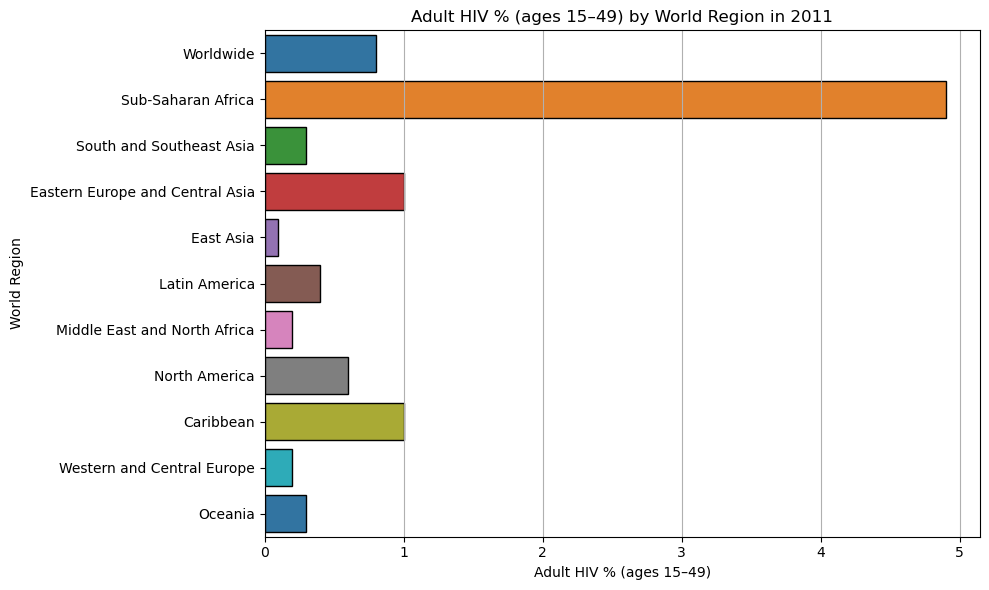

In [9]:


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=World_df, 
            x='Adult HIV % (ages 15–49)', 
            y='World region', 
            palette='tab10',
            edgecolor='black')

plt.title('Adult HIV % (ages 15–49) by World Region in 2011')
plt.xlabel('Adult HIV % (ages 15–49)')
plt.ylabel('World Region')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/World_HIV_plot.png')
plt.show()
#tab10

### Plot Inspecting African Countries

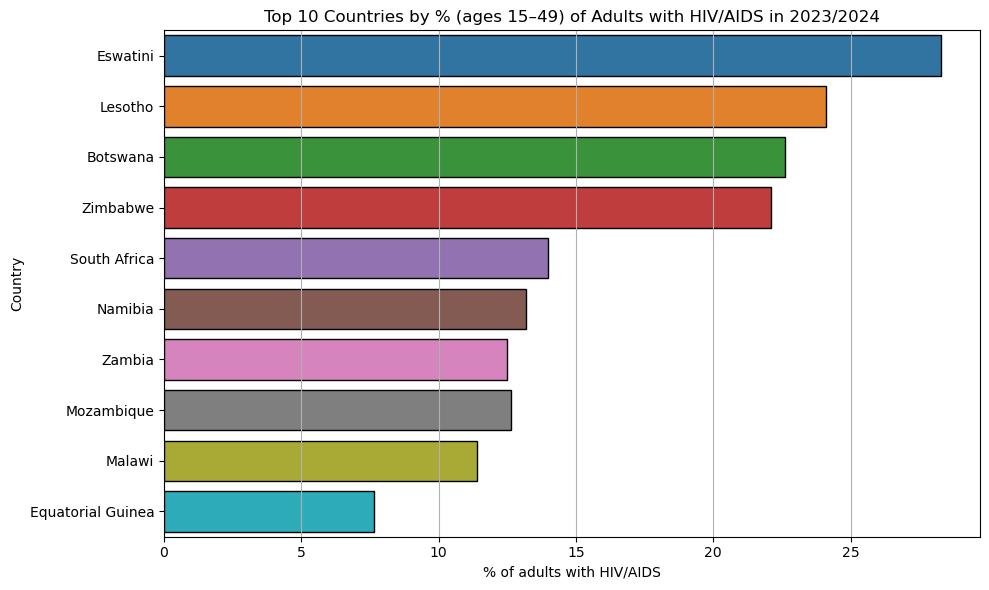

In [10]:
top_ten = HIV_df.head(10)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, 
            x=top_ten['% of adults with HIV/AIDS'].astype(float),  # Convert the '% of adults with HIV/AIDS' column to numeric
            y='Country', 
            palette='tab10',
            edgecolor='black')

plt.title('Top 10 Countries by % (ages 15–49) of Adults with HIV/AIDS in 2023/2024')
plt.xlabel('% of adults with HIV/AIDS')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'Images/Countries_HIV_plot.png')
plt.show()



### African Countries as a Map

C:\Users\15kof\AppData\Local\Temp\ipykernel_15128\3407837063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].replace({'Eswatini': 'eSwatini'})
C:\Users\15kof\AppData\Local\Temp\ipykernel_15128\3407837063.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\15kof\AppData\Local\Temp\ipykernel_15128\3407837063.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a project

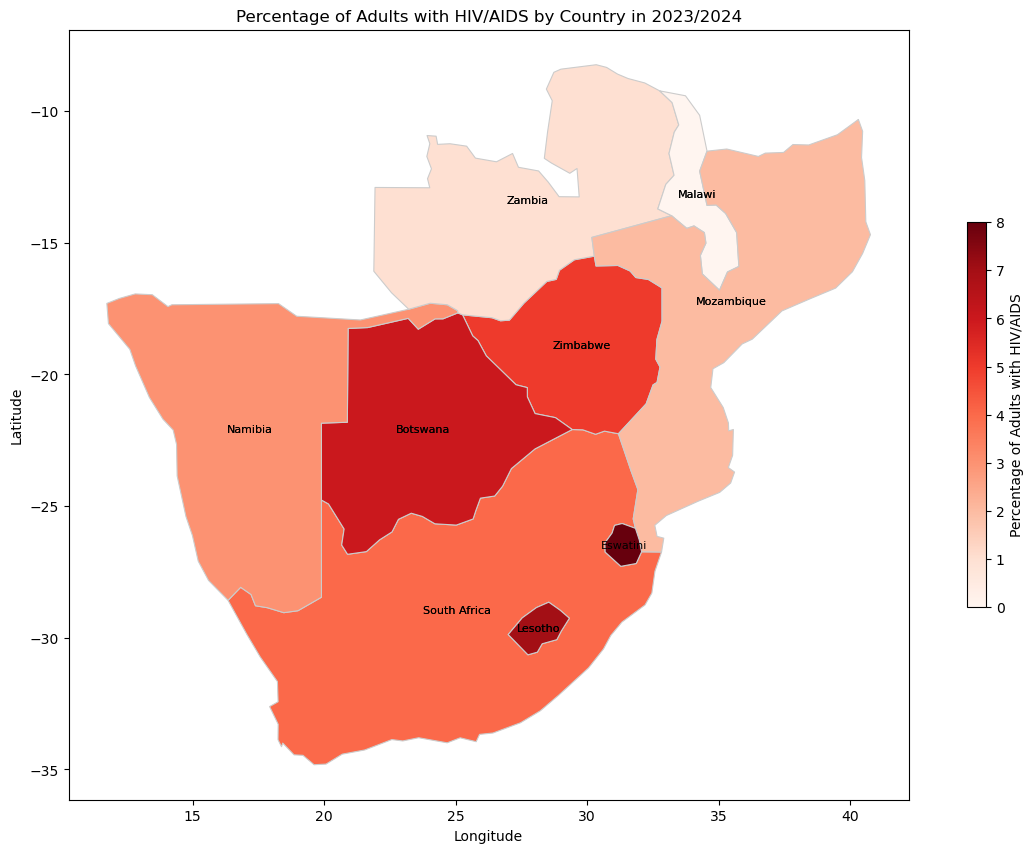

In [11]:

df = top_ten
df['Country'] = df['Country'].replace({'Eswatini': 'eSwatini'})

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data DataFrame
world = world.merge(df, how='left', left_on='name', right_on='Country')


# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world.plot(column='% of adults with HIV/AIDS', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add labels for countries in df
# Filter world DataFrame to include only countries present in df
world_to_label = world[world['name'].isin(df['Country'])]
for x, y, label in zip(world_to_label.geometry.centroid.x, world_to_label.geometry.centroid.y, world_to_label['Country']):
    if label != 'eSwatini':
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
 # Correct the spelling of "Eswatini" to match the database
    if label == 'eSwatini':
        label = 'Eswatini'
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

    
# Add a colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('Percentage of Adults with HIV/AIDS')

# Add titles and labels
plt.title('Percentage of Adults with HIV/AIDS by Country in 2023/2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig(r'Images/Map_HIV_plot.png')

# Show the plot
plt.show()


### GDP Map


C:\Users\15kof\AppData\Local\Temp\ipykernel_15128\4248858556.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\15kof\AppData\Local\Temp\ipykernel_15128\4248858556.py:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(world_to_label.geometry.centroid.x, world_to_label.geometry.centroid.y, world_to_label['Country']):


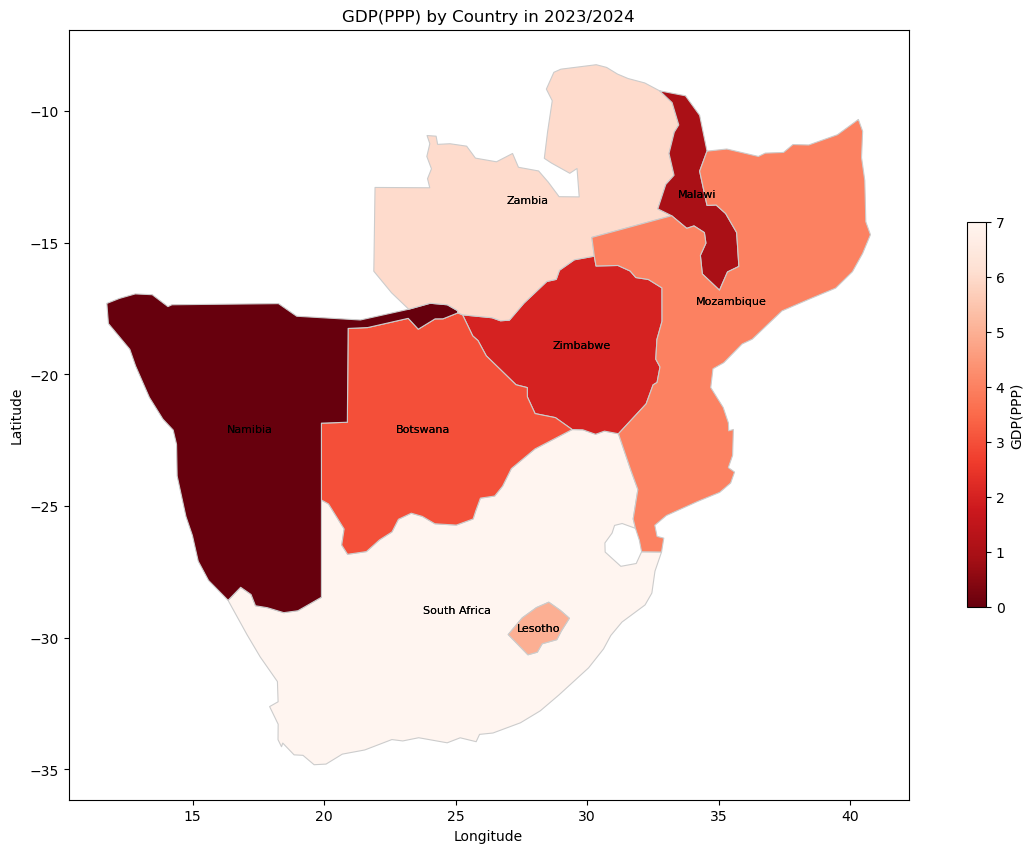

In [12]:

selected_countries = top_ten['Country']
df = Africa_GDP[Africa_GDP['Country'].isin(selected_countries)]


# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data DataFrame
world = world.merge(df, how='left', left_on='name', right_on='Country')


# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

cmap_reversed = 'Reds_r'


# Plot the world map
world.plot(column='GDP(PPP)', cmap=cmap_reversed, linewidth=0.8, ax=ax, edgecolor='0.8')

# Add labels for countries in df
# Filter world DataFrame to include only countries present in df
world_to_label = world[world['name'].isin(df['Country'])]
for x, y, label in zip(world_to_label.geometry.centroid.x, world_to_label.geometry.centroid.y, world_to_label['Country']):
    if label != 'eSwatini':
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
 # Correct the spelling of "Eswatini" to match the database
    if label == 'eSwatini':
        label = 'Eswatini'
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

    
    
# Add a colorbar
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label('GDP(PPP)')

# Add titles and labels
plt.title('GDP(PPP) by Country in 2023/2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig(r'Images/Map_GDP_plot.png')

# Show the plot
plt.show()





### HIV/AIDs Time Plot


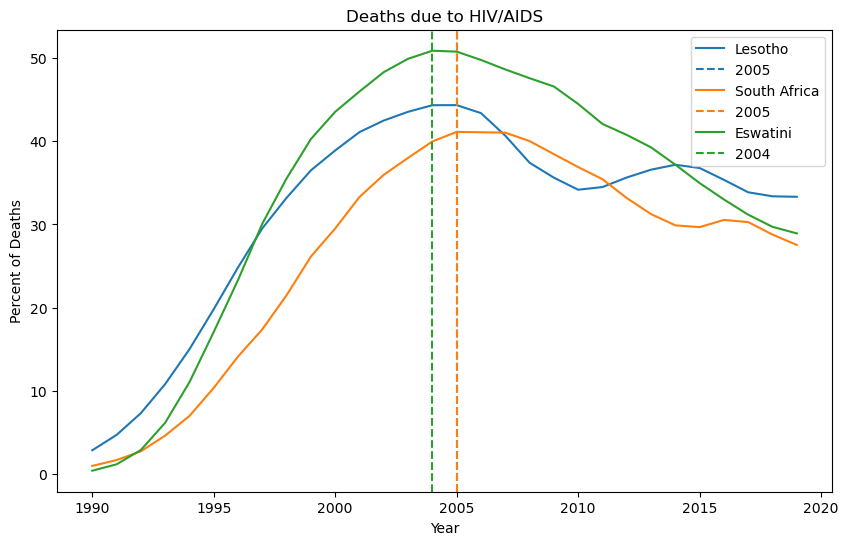

In [13]:
# Group data by 'Entity' and 'Year' and plot using matplotlib
plt.figure(figsize=(10, 6))

# Select only the countries you want to plot
selected_countries = [ 'Lesotho', 'South Africa','Eswatini']
df_selected = HIV_deaths_df[HIV_deaths_df['Entity'].isin(selected_countries)]




# set colours
sns.set_palette('tab10')


for country in selected_countries:
    country_data = df_selected[df_selected['Entity'] == country]

    plt.plot(country_data['Year'], 
             country_data['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'], 
             label=country)
    
   # if country == 'Eswatini':
  #Find the maximum value and corresponding year
    max_incidence = country_data['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'].max()
    year_of_max = country_data.loc[country_data['Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Percent)'] == max_incidence, 'Year'].values[0]
   
    country_col = plt.gca().lines[-1].get_color()

    # Plot a red dotted line at the highest point
    plt.axvline(x=year_of_max, 
                color=country_col, 
                linestyle='--', 
                label = year_of_max)


        
    
plt.savefig(r'Images/HIV_deaths_time_plot.png')
plt.title('Deaths due to HIV/AIDS')
plt.xlabel('Year')
plt.ylabel('Percent of Deaths')
plt.legend()
plt.show()

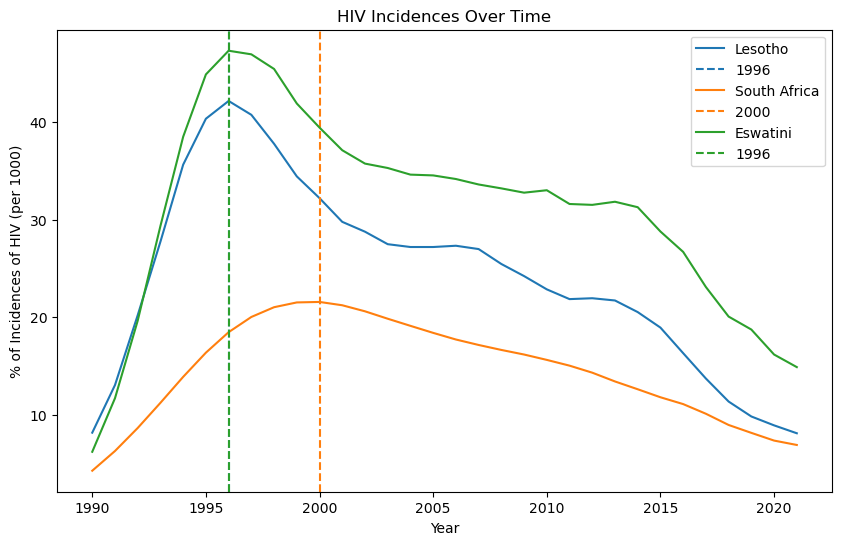

In [14]:
plt.figure(figsize=(10, 6))


selected_countries = [ 'Lesotho', 'South Africa','Eswatini']


Data_cleaned = HIV_Incidence_df.dropna()


# Convert 'Year' column to numerical type
Data_cleaned = HIV_Incidence_df.dropna().copy()
Data_cleaned.loc[:, 'Year'] = pd.to_numeric(Data_cleaned['Year'])

#Filter the data for each country and plot HIV deaths over time

for country in selected_countries:
    country_data = Data_cleaned[Data_cleaned['Country Name'] == country]

    plt.plot(country_data['Year'], 
                country_data['HIV_Incidences'], 
                label= country)
    
    #if country == 'Eswatini' :
 # Find the maximum value and corresponding year
    max_incidence = country_data['HIV_Incidences'].max()
    year_of_max = country_data.loc[country_data['HIV_Incidences'] == max_incidence, 'Year'].values[0]
    country_col = plt.gca().lines[-1].get_color()

    # Plot a red dotted line at the highest point
    plt.axvline(x=year_of_max, color=country_col, linestyle='--', label = year_of_max)

        
        
        
        
        
        
        
        
# Add labels and title
plt.xlabel('Year')
plt.ylabel('% of Incidences of HIV (per 1000)')
plt.title('HIV Incidences Over Time')
plt.legend()




custom_xticks = [1990, 1995, 2000, 2005, 2010, 2015, 2020]  # Define the positions of ticks
custom_xtick_labels = ['1990', '1995', '2000', '2005', '2010', '2015', '2020']  # Define the labels for each tick
plt.xticks(custom_xticks, custom_xtick_labels)


# Show plot
plt.grid(False)
plt.savefig(r'Images/HIV_Incidences_time_plot.png')

plt.show()


In [15]:
https://en.wikipedia.org/wiki/Sub-Saharan_Africa

SyntaxError: invalid syntax (4039016528.py, line 1)

In [2]:
RF_data = []

url = 'https://en.wikipedia.org/wiki/Sub-Saharan_Africa'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the class 'wikitable sortable'
table = soup.find('table', {'class': 'wikitable sortable'})

# Extract data from the table
rows = table.find_all('tr')  # Find all rows in the table

for row in rows[1:]:
    # Extract data from each cell in the row
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Append row data to HIV_data
    RF_data.append(row_data)


# Extract headers from the first row
headers = [header.get_text(strip=True) for header in rows[0].find_all('th')]

# Create a pandas DataFrame
RF_data = pd.DataFrame(RF_data, columns=headers)




# remove % signs and commas
for column in RF_data.columns:
    if RF_data[column].dtype == 'object':  # Check if the column contains strings
        RF_data[column] = RF_data[column].str.replace(',','').str.replace('%','')




# Split 'Literacy (M/F)' column into separate columns for male and female literacy
RF_data[['Male Literacy %', 'Female Literacy %']] = RF_data[headers[3]].str.split('/', expand=True)

# Drop the original 'Literacy (M/F)' column
RF_data.drop(columns=[headers[3]], inplace=True)
   
    
    
    
display(RF_data)


,Country,Population,Area (km2),GDP per Capita (PPP)[72],Trans (Rank/Score)[73],Life (Exp.)[71],HDI,EODBR/SAB[74],PFI(RANK/MARK),Male Literacy %,Female Literacy %
0,Angola,18498000,1246700,6800,168/2,42.4,0.486,172/171,132/5843,82.9,54.2
1,Burundi,8988091,27830,700,168/1.8,49,0.316,176/130,103/2900,67.3,52.2
2,Democratic Republic of the Congo,68692542,2345410,800,162/11.9,46.1,0.286,182/152,146/5350,80.9,54.1
3,Cameroon,18879301,475440,3700,146/2.2,50.3,0.482,171/174,109/3050,77,59.8
4,Central African Republic,4511488,622984,700,158/2.8,44.4,0.343,183/159,80/1775,64.8,33.5
5,Chad,10329208,1284000,2300,175/1.6,50.6,0.328,178/182,132/4450,40.8,12.8
6,Republic of the Congo,3700000,342000,800,162/1.9,54.8,0.533,N/A,116/3425,90.5,79.0
7,Equatorial Guinea,1110000,28051,37400,168/1.8,51.1,0.537,170/178,158/6550,93.4,80.3
8,Gabon,1514993,267667,18100,106/2.9,56.7,0.674,158/152,129/4350,88.5,79.7
9,Kenya,39002772,582650,3500,146/2.2,57.8,0.519,95/124,96/2500,77.7,70.2


In [18]:
HIV_df.rename(columns={'Country/Region': 'Country'}, inplace=True)

# Merge the datasets on the 'Country' column
merged_data = pd.merge(Africa_GDP, HIV_df, on='Country', how='inner')

merged_data.rename(columns={'Adult prevalenceof HIV/AIDS[1]': 'Adult prevalenceof HIV/AIDS'}, inplace=True)
merged_data.rename(columns={'Annual deathsfrom HIV/AIDS[3]': 'Annual deathsfrom HIV/AIDS'}, inplace=True)


# Display the merged dataset
#display(merged_data)
# Convert columns to numeric if they contain numerical data
merged_data['Peakyear'] = pd.to_numeric(merged_data['Peakyear'], errors='coerce')
merged_data['Year of estimate'] = pd.to_numeric(merged_data['Year of estimate'], errors='coerce')

# Filter rows where Year and Year of estimate match
filtered_data = merged_data[merged_data['Peakyear'] == merged_data['Year of estimate']]

display(filtered_data)

,Country,GDP(PPP),GDPpercapita,Peakyear,Adult prevalenceof HIV/AIDS,Number of peoplewith HIV/AIDS,Annual deathsfrom HIV/AIDS,Year of estimate
6,Kenya,338.964,6061.42,2023,5.10%,"1,710,000","24,000",2023
10,Sudan,220.533,4441.51,2016,0.20%,"56,000","3,000",2016
14,Uganda,145.157,2960.52,2023,5%,"1,590,000","23,300",2023
15,Cameroon,133.335,4398.31,2023,4%,"530,000","14,600",2023
16,Zambia,83.687,3776.37,2023,12.5%,"1,550,000","20,000",2023
30,Mauritius,31.720,25043.15,2022,0.16%,"6,671[28]",-,2022
